# ***Importing exel file***

In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [98]:
df = pd.read_excel('BodyFat.xls', usecols = "B:Q")
df.keys()

Index(['BODYFAT', 'DENSITY', 'AGE', 'WEIGHT', 'HEIGHT', 'ADIPOSITY', 'NECK',
       'CHEST', 'ABDOMEN', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS',
       'FOREARM', 'WRIST'],
      dtype='object')

Covariance matrix

In [99]:
X = df
cov_mat = X.cov()
cov_mat

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
BODYFAT,60.075763,-0.145753,28.245483,139.671527,-2.529755,20.584749,9.260466,45.928905,68.007997,34.743601,22.839571,9.492320,3.504689,11.545529,5.689682,2.515065
DENSITY,-0.145753,0.000362,-0.066587,-0.332269,0.006823,-0.049623,-0.021881,-0.109519,-0.163959,-0.083078,-0.055262,-0.022722,-0.008544,-0.028008,-0.013523,-0.005787
AGE,28.245483,-0.066587,158.811405,-4.720686,-7.923046,5.464025,3.477171,18.746223,31.310050,-4.544071,-13.238356,0.532366,-2.243948,-1.567215,-2.165925,2.512204
WEIGHT,139.671527,-0.332269,-4.720686,863.722719,33.185647,95.137383,59.348441,221.548750,281.410541,198.099047,134.032185,60.473281,30.568587,71.071090,37.431343,20.023036
HEIGHT,-2.529755,0.006823,-7.923046,33.185647,13.416513,-0.332605,2.259054,4.165407,3.468334,4.471301,2.854390,2.527020,1.643569,2.299789,1.692347,1.101330
ADIPOSITY,20.584749,-0.049623,5.464025,95.137383,-0.332605,13.308712,6.898222,28.042649,36.343465,23.084485,15.565277,6.279158,3.093537,8.226603,4.117792,2.131726
NECK,9.260466,-0.021881,3.477171,59.348441,2.259054,6.898222,5.909339,16.084217,19.766422,12.799440,8.878613,3.942235,1.968983,5.369868,3.063497,1.690357
CHEST,45.928905,-0.109519,18.746223,221.548750,4.165407,28.042649,16.084217,71.072918,83.254656,50.093988,32.303242,14.629275,6.901297,18.540367,9.883467,5.195850
ABDOMEN,68.007997,-0.163959,31.310050,281.410541,3.468334,36.343465,19.766422,83.254656,116.274745,67.522123,43.399068,19.171571,8.283173,22.315796,10.966889,6.239802
HIP,34.743601,-0.083078,-4.544071,198.099047,4.471301,23.084485,12.799440,50.093988,67.522123,51.323722,33.714832,14.228213,6.780108,16.001243,7.889814,4.214200


Correlation matrix

In [100]:
Corr_mat = X.corr(method='pearson')
Corr_mat

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
BODYFAT,1.000000,-0.988087,0.289174,0.613156,-0.089106,0.727994,0.491489,0.702885,0.813706,0.625700,0.561284,0.507786,0.266783,0.493031,0.363277,0.347573
DENSITY,-0.988087,1.000000,-0.277637,-0.594062,0.097881,-0.714732,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
AGE,0.289174,-0.277637,1.000000,-0.012746,-0.171645,0.118851,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
WEIGHT,0.613156,-0.594062,-0.012746,1.000000,0.308279,0.887352,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
HEIGHT,-0.089106,0.097881,-0.171645,0.308279,1.000000,-0.024891,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
ADIPOSITY,0.727994,-0.714732,0.118851,0.887352,-0.024891,1.000000,0.777857,0.911799,0.923880,0.883269,0.812706,0.713660,0.500317,0.746384,0.558594,0.625907
NECK,0.491489,-0.472966,0.113505,0.830716,0.253710,0.777857,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
CHEST,0.702885,-0.682599,0.176450,0.894191,0.134892,0.911799,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
ABDOMEN,0.813706,-0.798955,0.230409,0.887995,0.087813,0.923880,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
HIP,0.625700,-0.609331,-0.050332,0.940884,0.170394,0.883269,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090


# ***Applying PCA library***

In [101]:
Scaler = StandardScaler()

In [102]:
Scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
Scaled_data = Scaler.transform(df)

In [104]:
pca = PCA(n_components=3)

In [105]:
pca.fit(Scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
x_pca = pca.transform(Scaled_data)

In [107]:
pca.explained_variance_

array([9.81569016, 1.94298613, 1.08838316])

In [108]:
x_pca.shape

(252, 3)

Plot in 2D

Text(0, 0.5, 'Y-axis')

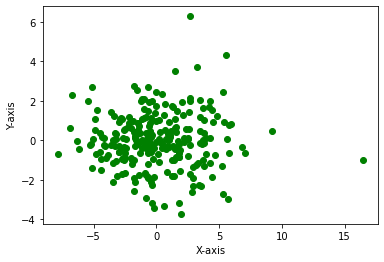

In [109]:
plt.figure()
plt.scatter(x_pca[:,0], x_pca[:,1], c="g", marker='o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

Plot in 3D

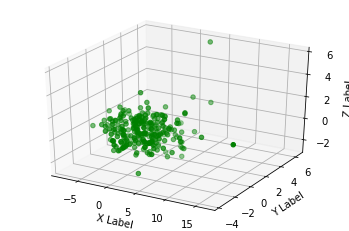

In [110]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')



ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c='g', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# ***Without using library***

Calculate eigen value and eigen vector from correlation matrix




In [112]:
E, E_V = np.linalg.eig(Corr_mat)


In [113]:
#Eigen values
E

array([9.77673901, 1.93527587, 1.08406418, 0.71308511, 0.65387211,
       0.51301292, 0.31923652, 0.26233662, 0.22416034, 0.18430129,
       0.13208077, 0.01103317, 0.07709517, 0.02345977, 0.04058785,
       0.04965932])

In [114]:
E.shape

(16,)

In [115]:
#Eigen vectors
E_V

array([[-0.23288808, -0.41096554, -0.09970085,  0.28715478, -0.13497013,
         0.28937207, -0.02773416,  0.01223896, -0.22289342, -0.02857962,
        -0.04631494, -0.71036437, -0.02306917,  0.05733302,  0.11413858,
        -0.08655908],
       [ 0.22812621,  0.41418638,  0.11719168, -0.29481412,  0.13242538,
        -0.31552449,  0.02537825, -0.04904323,  0.23634008,  0.04689151,
         0.0508671 , -0.69783024,  0.01382871,  0.02434311, -0.08472913,
         0.00667398],
       [-0.02704686, -0.44116593,  0.70652935, -0.073248  ,  0.12542265,
        -0.03558221,  0.27388965,  0.15718468,  0.2558197 , -0.11402451,
         0.30298219,  0.0121906 ,  0.06227602,  0.04072399,  0.07240788,
        -0.04691302],
       [-0.30952265,  0.09697852, -0.01870917,  0.068773  ,  0.02528097,
        -0.16317656, -0.02916258, -0.06070495,  0.11428681,  0.06116268,
         0.00916835,  0.07051921, -0.18488738,  0.87483476,  0.03278082,
        -0.18829957],
       [-0.06601034,  0.45935163,  0

In [116]:
E_V.shape

(16, 16)

In [118]:
#Selecting first 3 eigen values and veriance = 96.61%
#(100*(E[0] / sum(E)))+(100*(E[1] / sum(E)))+(100*(E[2] / sum(E)))


In [119]:
eigen1 = E_V.T[0]

In [120]:
eigen2 = E_V.T[1]

In [121]:
eigen3 = E_V.T[2]

In [122]:
x_pca = X.dot(eigen1)

In [123]:
y_pca = X.dot(eigen2)

In [124]:
z_pca = X.dot(eigen3)

In [125]:
x_pca.std

<bound method Series.std of 0     -202.808218
1     -209.303508
2     -207.666725
3     -219.112368
4     -227.000915
          ...    
247   -188.011804
248   -242.831389
249   -235.956593
250   -231.719129
251   -248.353546
Length: 252, dtype: float64>

Plot in 2D

Text(0, 0.5, 'Y-axis')

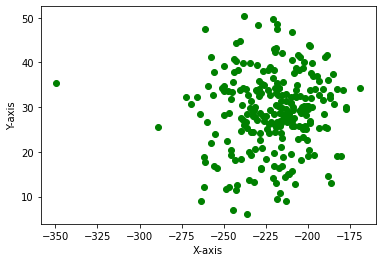

In [126]:
plt.figure()
plt.scatter(x_pca, y_pca, c="g", marker='o')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

Plot in 3D

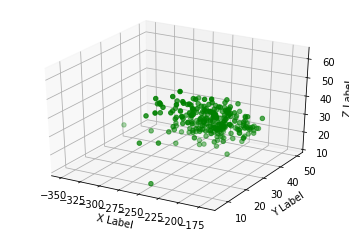

In [127]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_pca, y_pca, z_pca, c='g', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()